### Using NLP to Analyze Drug Reviews from Druglib.com

In [ ]:
https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Druglib.com%29

In [ ]:
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [ ]:
https://stackabuse.com/python-for-nlp-topic-modeling/

### Step by Step NLP Analysis

In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wickedbear/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wickedbear/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wickedbear/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
d_text = pd.read_csv('drugLibTrain_raw.tsv', sep='\t')
print(len(d_text))
d_text.head(4)

In [9]:
len(d_text)

3107

In [3]:
d_text.head(4)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...


In [4]:
d_text['effectiveness'].value_counts()

Highly Effective          1330
Considerably Effective     928
Moderately Effective       415
Ineffective                247
Marginally Effective       187
Name: effectiveness, dtype: int64

In [5]:
d_text['sideEffects'].value_counts()

Mild Side Effects                1019
No Side Effects                   930
Moderate Side Effects             614
Severe Side Effects               369
Extremely Severe Side Effects     175
Name: sideEffects, dtype: int64

In [6]:
d_text['rating'].value_counts()

10    742
8     558
9     480
7     350
1     305
5     159
6     157
3     146
4     107
2     103
Name: rating, dtype: int64

In [8]:
d_text['condition'].value_counts()

depression                     236
acne                           165
anxiety                         63
insomnia                        54
birth control                   49
                              ... 
add & anxiety                    1
post breast cancer               1
serious food poisoning, uti      1
alergy                           1
sggression, hyperactivity        1
Name: condition, Length: 1426, dtype: int64

In [12]:
d_text['benefitsReview']

0       slowed the progression of left ventricular dys...
1       Although this type of birth control has more c...
2       I was used to having cramps so badly that they...
3       The acid reflux went away for a few months aft...
4       I think that the Lyrica was starting to help w...
                              ...                        
3102    Increased focus, attention, productivity. Bett...
3103      Emotions were somewhat blunted. Less moodiness.
3104                                                  ---
3105                 Controlled complex partial seizures.
3106    The drug Micardis did seem to alleviate my hig...
Name: benefitsReview, Length: 3107, dtype: object

In [13]:
review = d_text['benefitsReview']
review

0       slowed the progression of left ventricular dys...
1       Although this type of birth control has more c...
2       I was used to having cramps so badly that they...
3       The acid reflux went away for a few months aft...
4       I think that the Lyrica was starting to help w...
                              ...                        
3102    Increased focus, attention, productivity. Bett...
3103      Emotions were somewhat blunted. Less moodiness.
3104                                                  ---
3105                 Controlled complex partial seizures.
3106    The drug Micardis did seem to alleviate my hig...
Name: benefitsReview, Length: 3107, dtype: object

### Step by Step NLP Analysis

#### Tokenizing

Do this for each Review column

In [18]:
tokenized_review = review.apply(nltk.word_tokenize)
tokenized_review.head(3)

0    [slowed, the, progression, of, left, ventricul...
1    [Although, this, type, of, birth, control, has...
2    [I, was, used, to, having, cramps, so, badly, ...
Name: benefitsReview, dtype: object

In [20]:
d_text["tokenized"] = review.apply(nltk.word_tokenize)

In [22]:
print(tokenized_review)

0       [slowed, the, progression, of, left, ventricul...
1       [Although, this, type, of, birth, control, has...
2       [I, was, used, to, having, cramps, so, badly, ...
3       [The, acid, reflux, went, away, for, a, few, m...
4       [I, think, that, the, Lyrica, was, starting, t...
                              ...                        
3102    [Increased, focus, ,, attention, ,, productivi...
3103    [Emotions, were, somewhat, blunted, ., Less, m...
3104                                              [--, -]
3105          [Controlled, complex, partial, seizures, .]
3106    [The, drug, Micardis, did, seem, to, alleviate...
Name: benefitsReview, Length: 3107, dtype: object


In [32]:
total_words = []
for review in tokenized_review:
    for word in review:
        total_words.append(word)

In [34]:
fdist = FreqDist(total_words)
print(fdist)

<FreqDist with 9540 samples and 126845 outcomes>


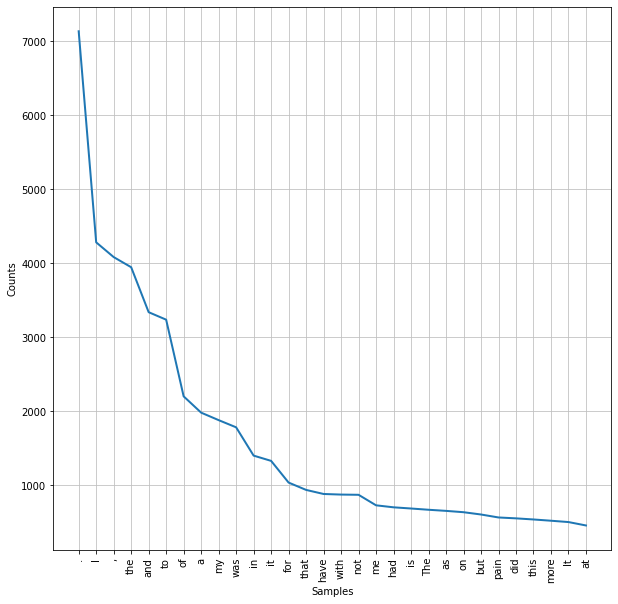

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
plt.figure(figsize=(10,10))
fdist.plot(30)

#### Removing Stop Words

In [40]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'her', 'should', 'while', 'further', "you'd", 'down', 'themselves', "aren't", 'into', 'itself', 'has', 'when', 'shan', 'such', "isn't", "needn't", 'haven', 'the', 'there', 'it', 'am', 'ma', 'each', 'needn', 'is', "should've", 'o', 'because', "shouldn't", 'who', 'both', 'his', 'all', 'mustn', 'whom', "you've", 'can', 'some', 'than', 'him', 'didn', 'this', 'where', 'hers', "it's", 'not', 'again', 'how', 'd', "weren't", 'so', 'aren', 'by', 'before', 'll', 'of', 'if', 'to', 'most', "that'll", 'herself', 'few', "couldn't", 'them', 'was', 'now', 'ain', 'been', 'yourself', 'just', 'its', 'yours', 'any', "hadn't", 'over', 'which', "didn't", 'between', 'for', "haven't", "wouldn't", 'too', 'what', 'until', 'a', 'below', 'mightn', 'are', 'won', 'off', 'he', 'during', 'don', 'were', 's', 'their', 'no', 'she', 'having', 'my', 'after', 'isn', 'be', 'i', "shan't", 'very', 'that', 'those', 'wouldn', 'as', 'why', 'me', 'in', 'an', 'hadn', 'himself', 'do', 'they', 'these', 'shouldn', "mightn't", 'doesn

In [44]:
filtered_review=[]
for w in total_words:
    if w not in stop_words:
        filtered_review.append(w)
print("Filterd Words:",filtered_review[:20])

Filterd Words: ['slowed', 'progression', 'left', 'ventricular', 'dysfunction', 'overt', 'heart', 'failure', 'alone', 'agents', 'managment', 'hypertension', 'mangagement', 'congestive', 'heart', 'failur', 'Although', 'type', 'birth', 'control']


In [46]:
print(len(total_words))
print(len(filtered_review))

126845
82365


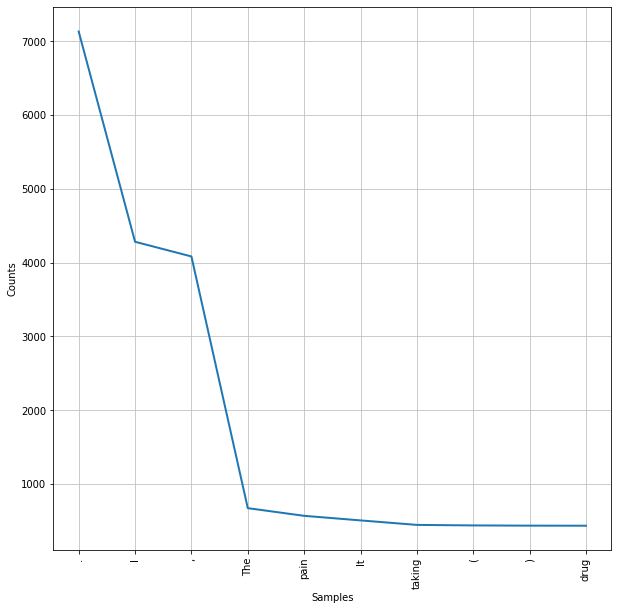

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [47]:
fdist = FreqDist(filtered_review)
plt.figure(figsize=(10,10))
fdist.plot(10)

Why are words like The, It, -, (, ) appearing above?

#### Stemming

In [28]:
ps = PorterStemmer()

stemmed_review=[]
for w in filtered_review:
    stemmed_review.append(ps.stem(w))

print(stemmed_review)

['slow', 'progress', 'left', 'ventricular', 'dysfunct', 'overt', 'heart', 'failur', 'alon', 'agent', 'manag', 'hypertens', 'mangag', 'congest', 'heart', 'failur']


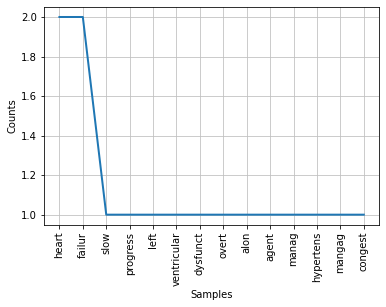

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [29]:
fdist = FreqDist(stemmed_review)
fdist.plot(30)

#### Lemmatiziation

In [30]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

In [31]:
print("movies:", lemmatizer.lemmatize("movies")) 
print("collecting:", lemmatizer.lemmatize("collecting")) 
print("collection:", lemmatizer.lemmatize("collection")) 
print("collections:", lemmatizer.lemmatize("collections")) 

movies: movie
collecting: collecting
collection: collection
collections: collection


In [32]:
# comparing it with stemming 
print("movies:", ps.stem("movies")) 
print("collecting :", ps.stem("collecting")) 

movies: movi
collecting : collect


In [33]:
# we can also lemmatize our original reviews
lemmatized_review=[]
for w in filtered_review:
    lemmatized_review.append(lemmatizer.lemmatize(w))

print(lemmatized_review)

['slowed', 'progression', 'left', 'ventricular', 'dysfunction', 'overt', 'heart', 'failure', 'alone', 'agent', 'managment', 'hypertension', 'mangagement', 'congestive', 'heart', 'failur']
